<center><font size=5> Challenge Exploratory Data Analysis of the Breast Cancer Wisconsin Dataset</font></center>

*
author:
date: 24th October, 2025

Table of Contents**
<a href='#intro'>1. Project Overview and Objectives</a>
<a href='#dataset'>1.1. Dataset Description</a>
<a href='#context'>1.2. Why Breast Cancer Analysis Matters</a>

<a href='#basic'>2. Basic Understanding</a>
<a href='#load'>2.1. Data Loading and Structure</a>
<a href='#columns'>2.2. Feature Types and Column Information</a>
<a href='#missing'>2.3. Missing Values Analysis</a>

<a href='#viz'>3. Data Visualization & Insights</a>
<a href='#dist'>3.1. Feature Distribution Analysis</a>
<a href='#relation'>3.2. Feature Relationships & Correlations</a>
<a href='#compare'>3.3. Malignant vs Benign Comparisons</a>

<a href='#concl'>4. Final Observations & Insights</a>

# Basic understanding 
## Data loading and Exploitation
### 1- Load the dataset

In [132]:
import pandas as pd
# Load the dataset
df = pd.read_csv(("data.csv"))
# Display the first few rows
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dataset Feature Descriptions

- **id**: Unique identifier for each patient/sample.  
- **diagnosis**: Tumor classification — `M` = malignant, `B` = benign.

#### Mean (average) measurements of the tumor
- **radius_mean**: Mean distance from center to perimeter.  
- **texture_mean**: Average variation in gray-scale pixel intensity.  
- **perimeter_mean**: Mean perimeter length of the tumor boundary.  
- **area_mean**: Mean area of the tumor.  
- **smoothness_mean**: Average local variation in radius length (surface smoothness).  
- **compactness_mean**: Mean of (perimeter² / area - 1.0).  
- **concavity_mean**: Mean severity of concave portions of the contour.  
- **concave points_mean**: Mean number of concave boundary points.  
- **symmetry_mean**: Average symmetry of the tumor shape.  
- **fractal_dimension_mean**: Mean complexity of the boundary.

#### Standard error (variation) of the same features
- **radius_se**: Standard error of radius.  
- **texture_se**: Standard error of texture.  
- **perimeter_se**: Standard error of perimeter.  
- **area_se**: Standard error of area.  
- **smoothness_se**: Standard error of smoothness.  
- **compactness_se**: Standard error of compactness.  
- **concavity_se**: Standard error of concavity.  
- **concave points_se**: Standard error of concave points.  
- **symmetry_se**: Standard error of symmetry.  
- **fractal_dimension_se**: Standard error of fractal dimension.

#### “Worst” (largest) values observed in the tumor
- **radius_worst**: Largest observed radius.  
- **texture_worst**: Largest observed texture variation.  
- **perimeter_worst**: Largest observed perimeter value.  
- **area_worst**: Largest observed tumor area.  
- **smoothness_worst**: Worst (highest) smoothness value.  
- **compactness_worst**: Worst compactness value.  
- **concavity_worst**: Worst concavity value.  
- **concave points_worst**: Worst count of concave points.  
- **symmetry_worst**: Worst symmetry score.  
- **fractal_dimension_worst**: Highest fractal dimension observed.

### we have 29 features

### 3-Data Type

In [85]:
df = pd.read_csv("Data.csv")
# print the data type of each column 
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [86]:
# rename any column for better clarity
df.rename(columns={'id':'tunor'}, inplace= True)
df

tunor diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11

In [77]:
df = pd.read_csv("Data.csv")
# check for missing values
print(df.isnull())
df.dropna(inplace=True)
# 

        id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
5    False      False        False         False           False      False   
6    False      False        False         False           False      False   
7    False      False        False         False           False      False   
8    False      False        False         False           False      False   
9    False      False        False         False           False      False   
10   False      False        False         False           False      False   
11   False      False        False         False    

In [87]:
# get first two rows by position
df.iloc[0:2]

tunor diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            184.6      2019.0            0.1622             0.6656   
1            158.8      1956.0            0.1238             0.1866   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN

In [88]:
df.loc[564,'radius_mean']

np.float64(21.56)

In [90]:
condition = (df['radius_mean'] > 18) & (df['diagnosis'] == 'M')
df[condition]

tunor diagnosis  radius_mean  texture_mean  perimeter_mean  \
1       842517         M        20.57         17.77           132.9   
2     84300903         M        19.69         21.25           130.0   
4     84358402         M        20.29         14.34           135.1   
6       844359         M        18.25         19.98           119.6   
12      846226         M        19.17         24.80           132.4   
18      849014         M        19.81         22.15           130.0   
23      851509         M        21.16         23.04           137.2   
27      852781         M        18.61         20.25           122.1   
30      853401         M        18.63         25.11           124.8   
33      854002         M        19.27         26.47           127.9   
42      855625         M        19.07         24.81           128.3   
45      857010         M        18.65         17.60           123.7   
53      857392         M        18.22         18.70           120.3   
56      857637         M        19.21         18.57           125.5   
70      859575         M        18.94         21.31           123.6   
77     8610637         M        18.05         16.15           120.2   
78     8610862         M        20.18         23.97           143.7   
82     8611555         M        25.22         24.91           171.5   
83     8611792         M        19.10         26.29           129.1   
85     8612399         M        18.46         18.52           121.1   
87    86135502         M        19.02         24.59           122.0   
95       86208         M        20.26         23.03           132.4   
108      86355         M        22.27         19.67           152.8   
121      86517         M        18.66         17.12           121.4   
122     865423         M        24.25         20.20           166.2   
127     866203         M        19.00         18.91           123.4   
129     866674         M        19.79         25.12           130.4   
134     867739         M        18.45         21.91           120.2   
161    8711803         M        19.19         15.94           126.3   
162     871201         M        19.59         18.15           130.7   
164    8712289         M        23.27         22.04           152.1   
180     873592         M        27.22         21.87           182.1   
181     873593         M        21.09         26.57           142.7   
186     874217         M        18.31         18.58           118.6   
197     877159         M        18.08         21.84           117.4   
198     877486         M        19.18         22.49           127.5   
202     878796         M        23.29         26.67           158.9   
210  881046502         M        20.58         22.14           134.7   
212    8810703         M        28.11         18.47           188.5   
218    8811842         M        19.80         21.56           129.7   
219   88119002         M        19.53         32.47           128.0   
233   88206102         M        20.51         27.81           134.4   
236   88299702         M        23.21         26.97           153.5   
237     883263         M        20.48         21.46           132.5   
244     884180         M        19.40         23.50           129.1   
250     884948         M        20.94         23.56           138.9   
252     885429         M        19.73         19.82           130.7   
254     886226         M        19.45         19.33           126.5   
256   88649001         M        19.55         28.77           133.6   
260     887549         M        20.31         27.06           132.9   
265   88995002         M        20.73         31.12           135.7   
272    8910988         M        21.75         20.99           147.3   
277    8911670         M        18.81         19.98           120.9   
280    8912049         M        19.16         26.60           126.2   
282      89122         M        19.40         18.18           127.2   
300     892438         M        1

In [89]:
df.describe()

tunor  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75% 

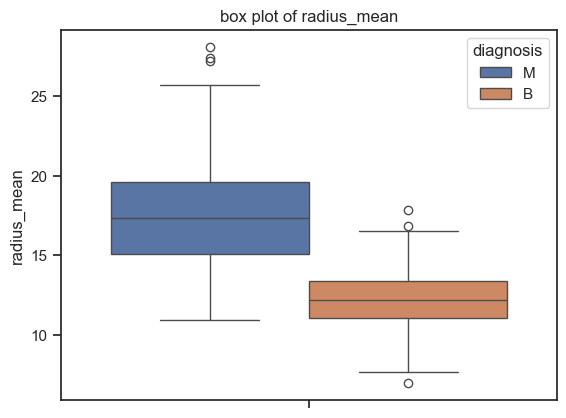

In [91]:
# outliers or extreme values
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='radius_mean',data=df,hue='diagnosis')
plt.title('box plot of radius_mean')
plt.show()

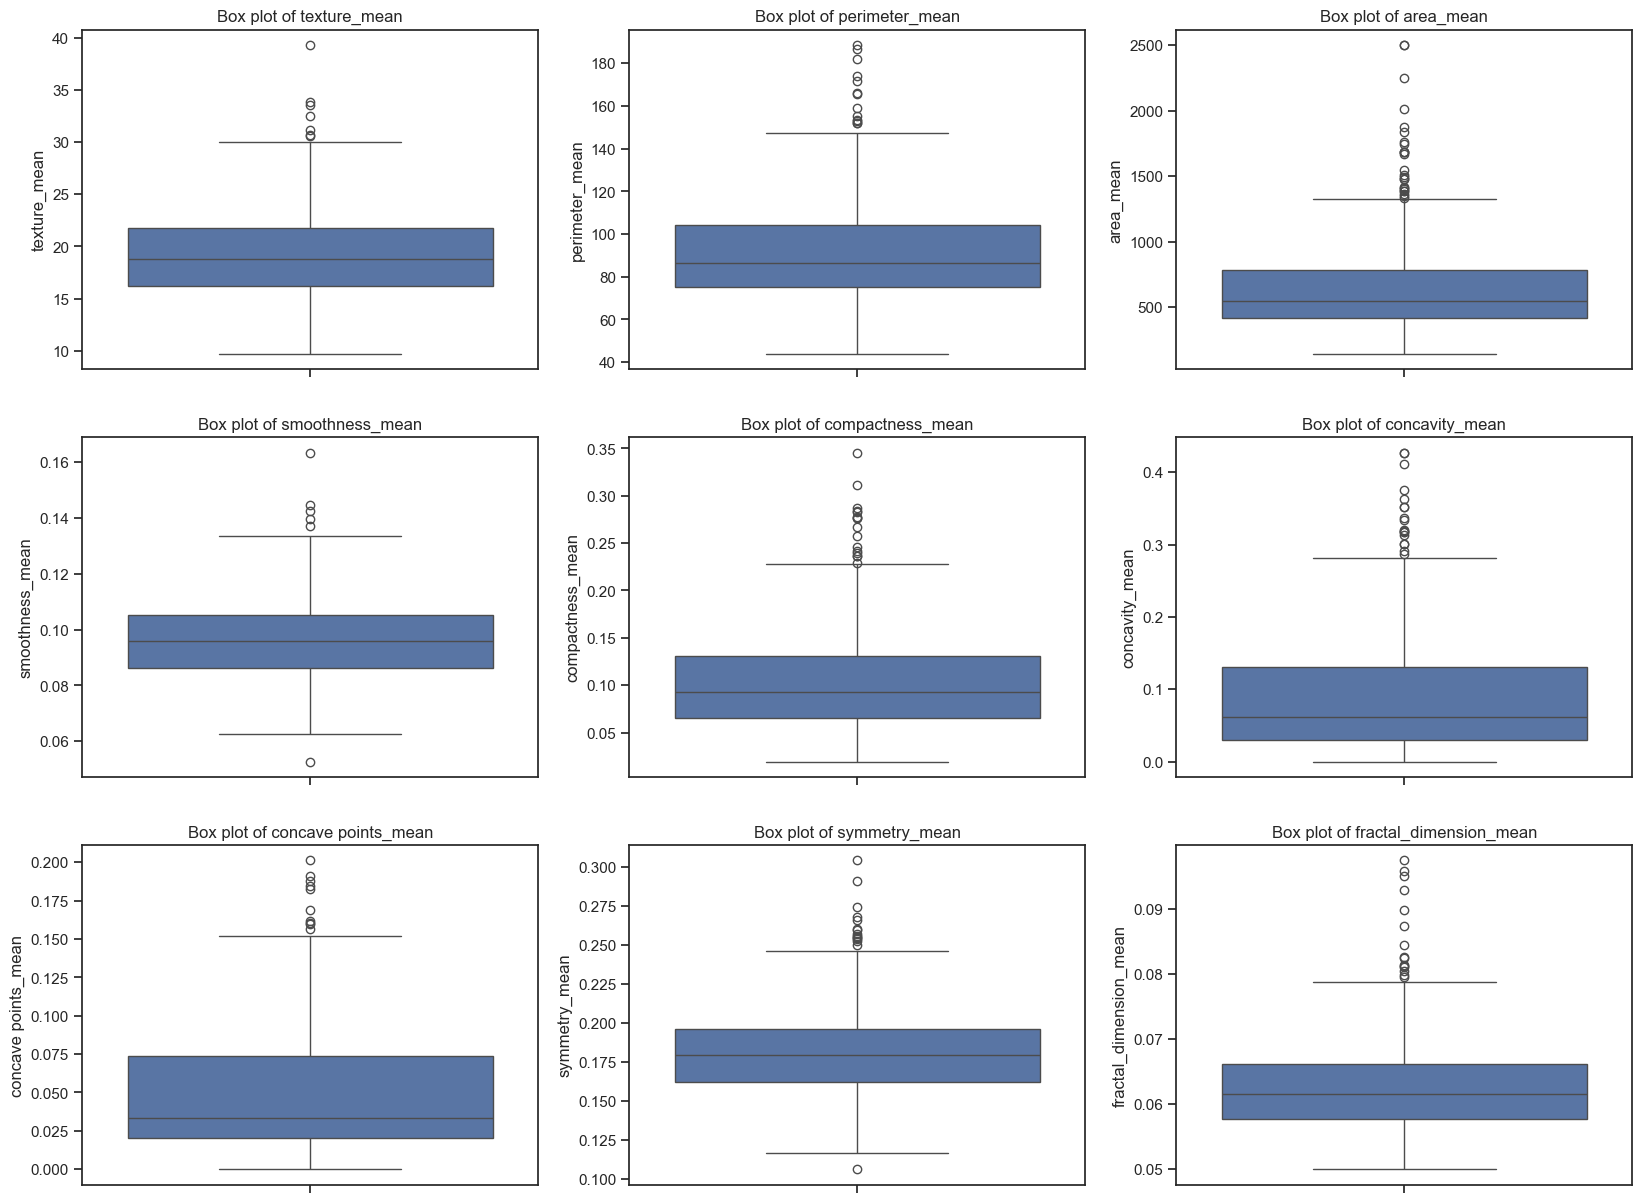

In [92]:
columns=['texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
# represent box plots for selected columns
plt.figure(figsize=(20,15))
for i, col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=col,data=df)
    plt.title(f'Box plot of {col}')

In [94]:
# Get all feature columns
feature_columns = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32']).tolist()


KeyError: "['id'] not found in axis"

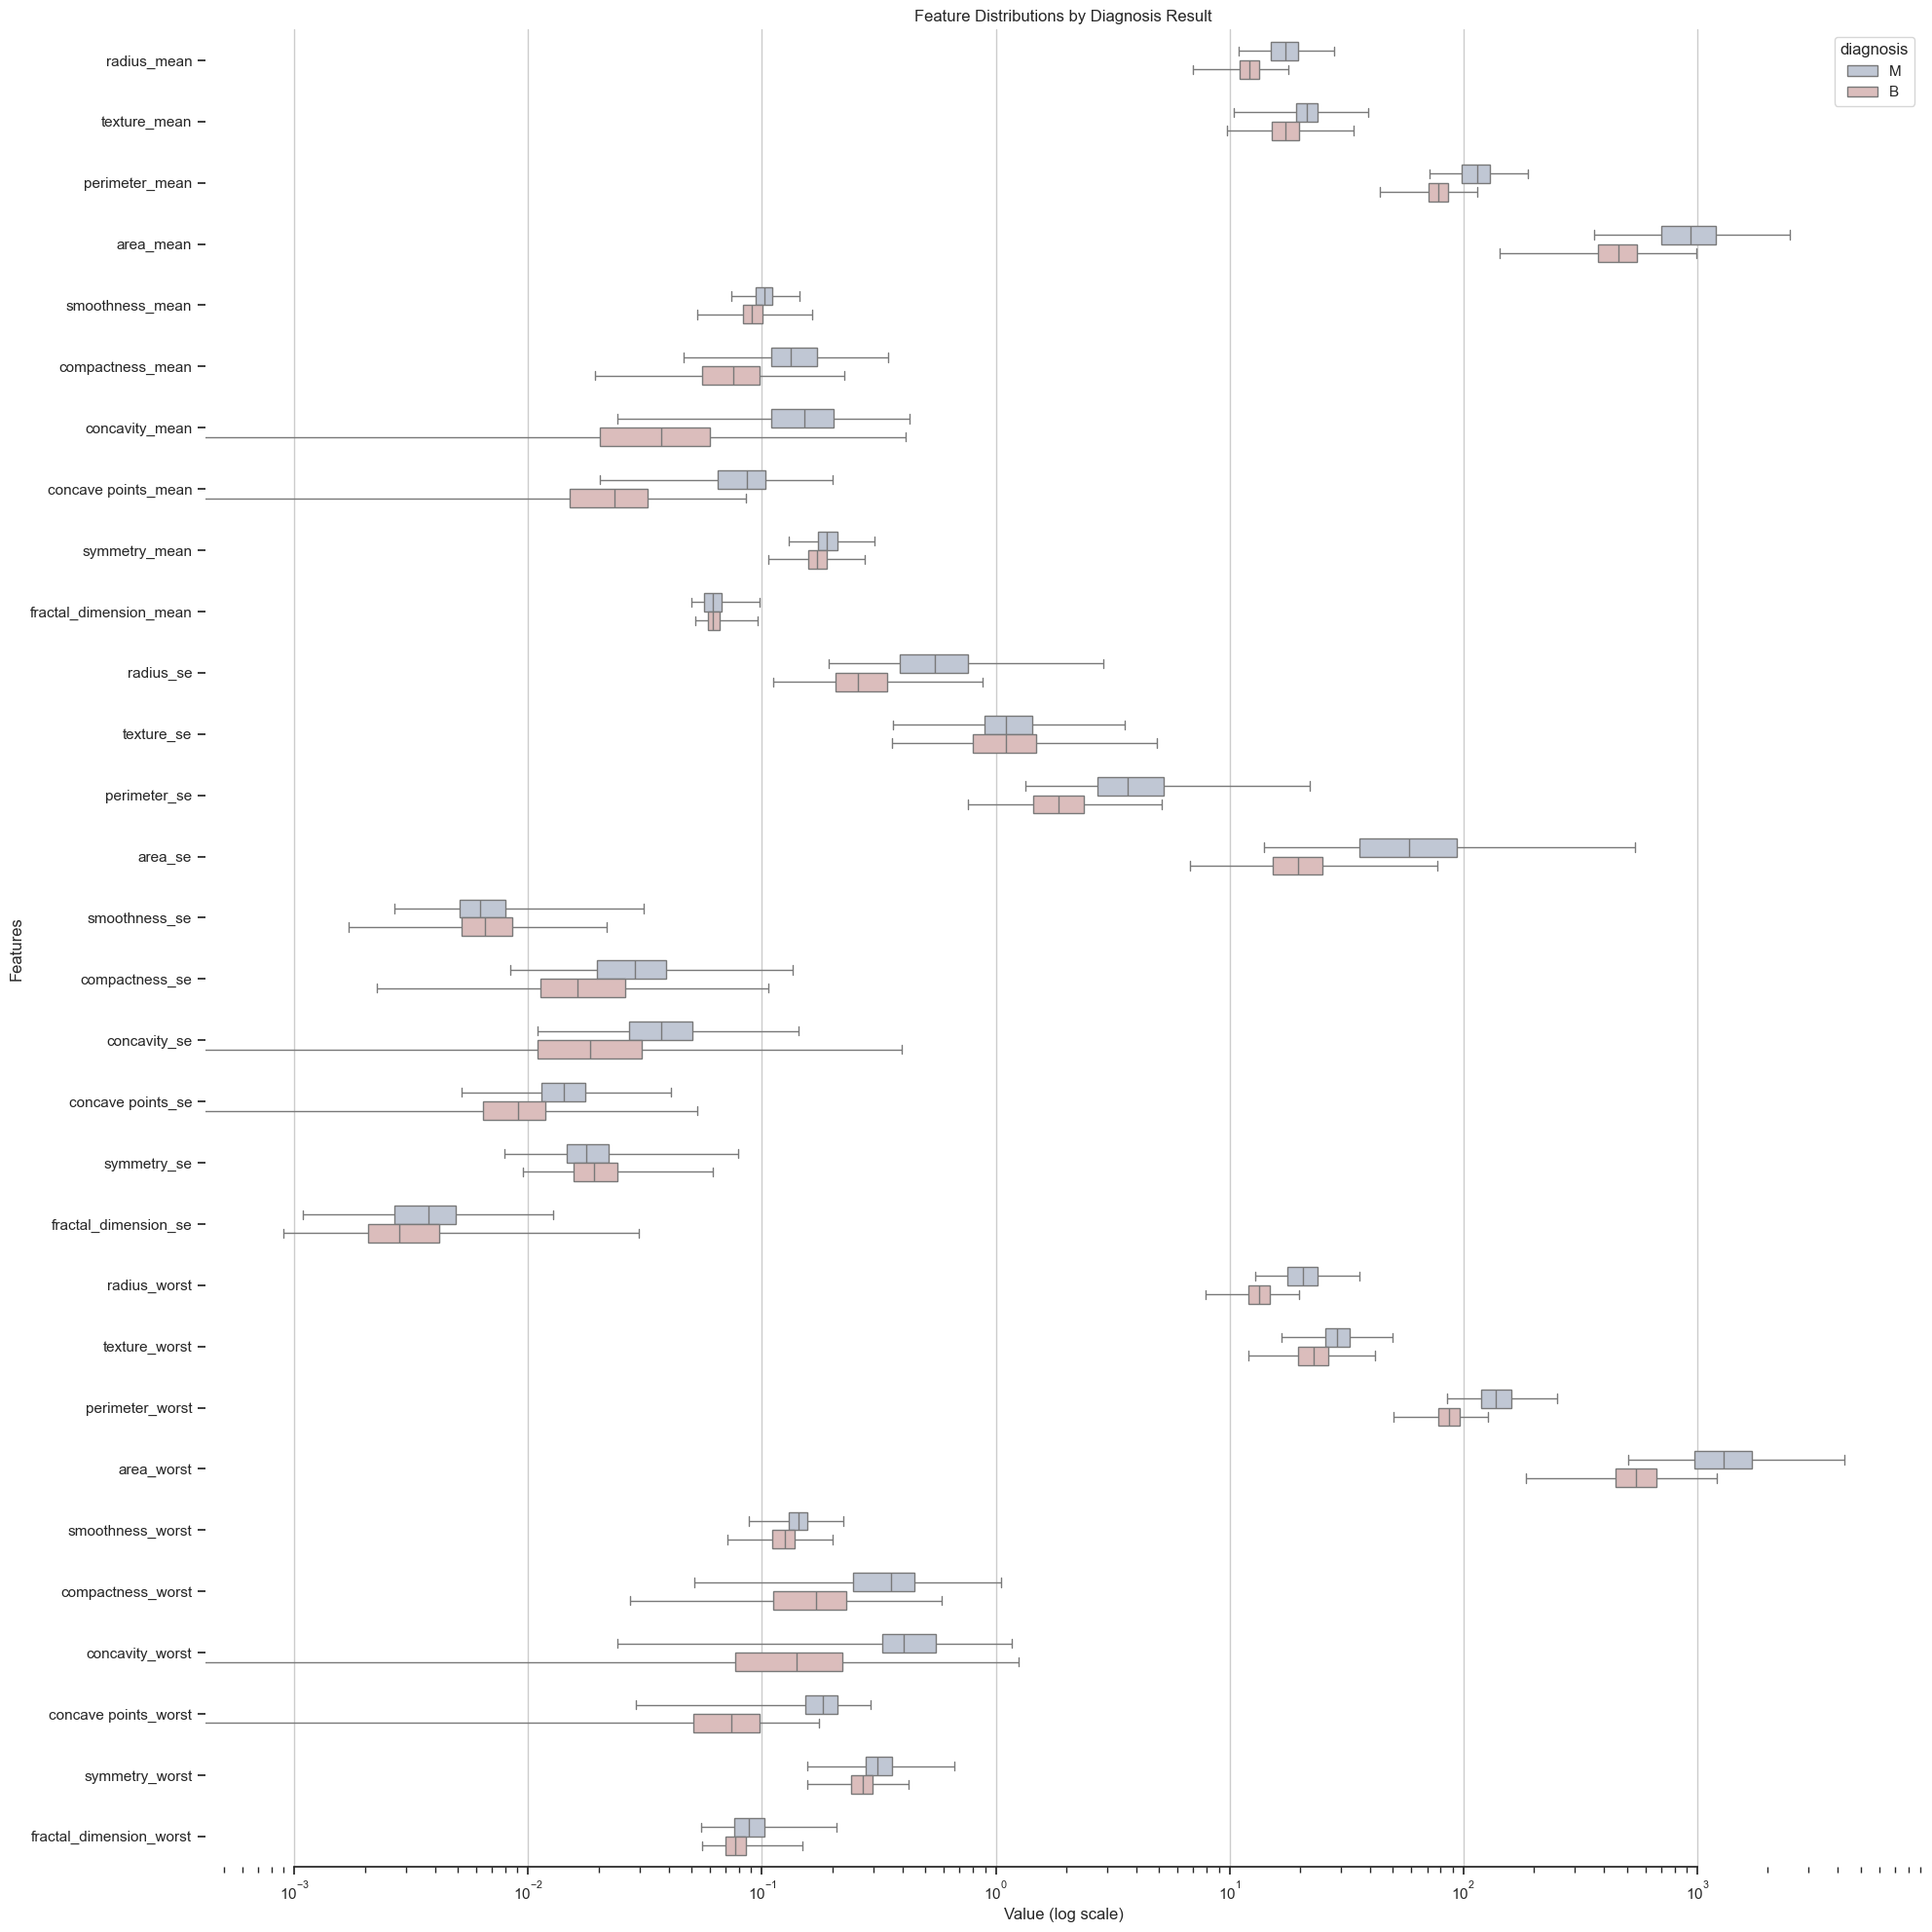

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="ticks")

# Create a long-format dataframe for plotting
plot_data = pd.melt(df, 
                    id_vars=['diagnosis'], 
                    value_vars=feature_columns,
                    var_name='feature', 
                    value_name='value')

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 20))
ax.set_xscale("log")

# Plot the feature values with horizontal boxes
sns.boxplot(
    plot_data, x="value", y="feature", hue="diagnosis",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
#sns.stripplot(plot_data, x="value", y="feature", size=2, color=".3", alpha=0.3)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Features", xlabel="Value (log scale)")
sns.despine(trim=True, left=True)

plt.title("Feature Distributions by Diagnosis Result")
plt.tight_layout()
plt.show()

In [97]:
df.head()

tunor diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [99]:
columns = ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

# OR: select those columns from the DataFrame
features_df = df[columns]

# build feature_columns by dropping columns (pass names as separate list items)
# feature_columns = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32']).tolist()
df.groupby('diagnosis')[columns].describe().T

diagnosis                        B            M
texture_mean     count  357.000000   212.000000
                 mean    17.914762    21.604906
                 std      3.995125     3.779470
                 min      9.710000    10.380000
                 25%     15.150000    19.327500
                 50%     17.390000    21.460000
                 75%     19.760000    23.765000
                 max     33.810000    39.280000
perimeter_mean   count  357.000000   212.000000
                 mean    78.075406   115.365377
                 std     11.807438    21.854653
                 min     43.790000    71.900000
                 25%     70.870000    98.745000
                 50%     78.180000   114.200000
                 75%     86.100000   129.925000
                 max    114.600000   188.500000
area_mean        count  357.000000   212.000000
                 mean   462.790196   978.376415
                 std    134.287118   367.937978
                 min    143.500000   361.600000
                 25%    378.200000   705.300000
                 50%    458.400000   932.000000
                 75%    551.100000  1203.750000
                 max    992.100000  2501.000000
smoothness_mean  count  357.000000   212.000000
                 mean     0.092478     0.102898
                 std      0.013446     0.012608
                 min      0.052630     0.073710
                 25%      0.083060     0.094010
                 50%      0.090760     0.102200
                 75%      0.100700     0.110925
                 max      0.163400     0.144700
compactness_mean count  357.000000   212.000000
                 mean     0.080085     0.145188
                 std      0.033750     0.053987
                 min      0.019380     0.046050
                 25%      0.055620     0.109600
                 50%      0.075290     0.132350
                 75%      0.097550     0.172400
                 max      0.223900     0.345400

In [100]:
pd.set_option('display.max_columns', None)  # afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # afficher toutes les lignes
columns=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']
#feature_columns = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32']).tolist()

df.groupby('diagnosis')[columns].describe().T

diagnosis                       B            M
radius_mean     count  357.000000   212.000000
                mean    12.146524    17.462830
                std      1.780512     3.203971
                min      6.981000    10.950000
                25%     11.080000    15.075000
                50%     12.200000    17.325000
                75%     13.370000    19.590000
                max     17.850000    28.110000
texture_mean    count  357.000000   212.000000
                mean    17.914762    21.604906
                std      3.995125     3.779470
                min      9.710000    10.380000
                25%     15.150000    19.327500
                50%     17.390000    21.460000
                75%     19.760000    23.765000
                max     33.810000    39.280000
perimeter_mean  count  357.000000   212.000000
                mean    78.075406   115.365377
                std     11.807438    21.854653
                min     43.790000    71.900000
                25%     70.870000    98.745000
                50%     78.180000   114.200000
                75%     86.100000   129.925000
                max    114.600000   188.500000
area_mean       count  357.000000   212.000000
                mean   462.790196   978.376415
                std    134.287118   367.937978
                min    143.500000   361.600000
                25%    378.200000   705.300000
                50%    458.400000   932.000000
                75%    551.100000  1203.750000
                max    992.100000  2501.000000
smoothness_mean count  357.000000   212.000000
                mean     0.092478     0.102898
                std      0.013446     0.012608
                min      0.052630     0.073710
                25%      0.083060     0.094010
                50%      0.090760     0.102200
                75%      0.100700     0.110925
                max      0.163400     0.144700

# directly question

In [101]:
## question1 : 
# the most frequently occurringvalue in diagnosis
print("the most frequently occurring value in diagnosis column is :", df['diagnosis'].mode()[0])


the most frequently occurring value in diagnosis column is : B


2_ pairwaise relationship

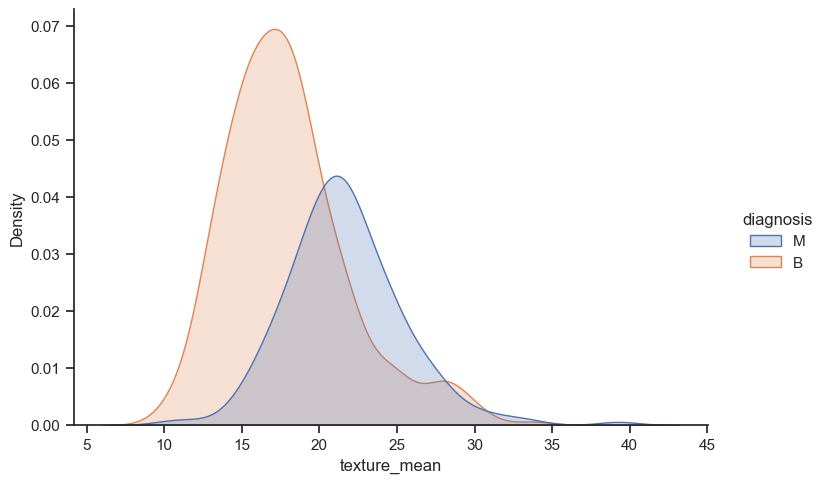

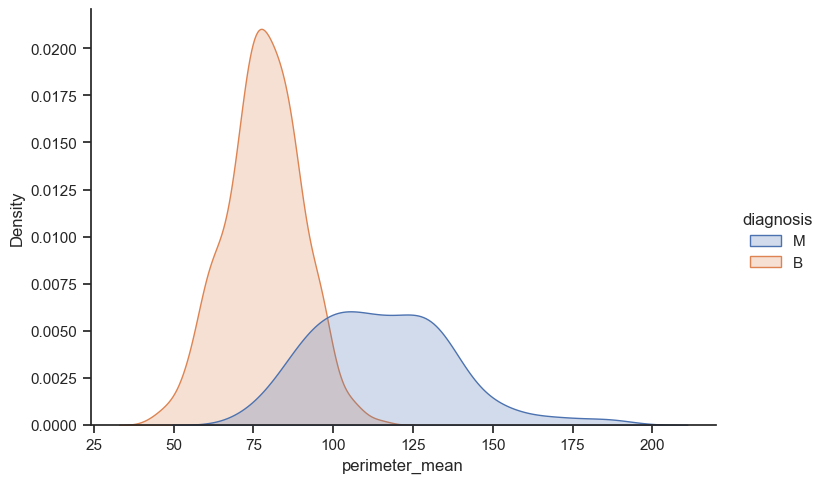

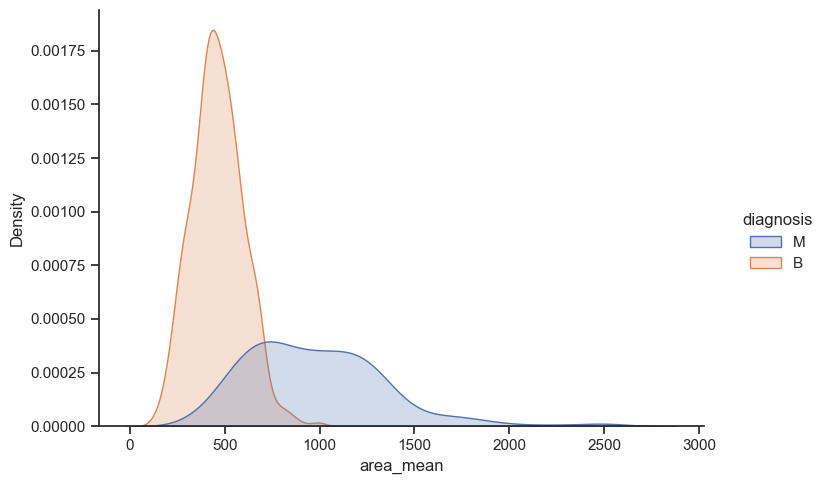

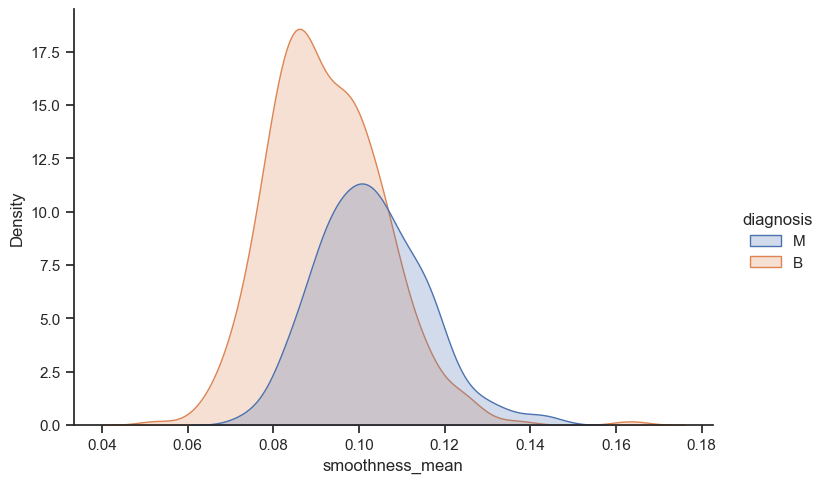

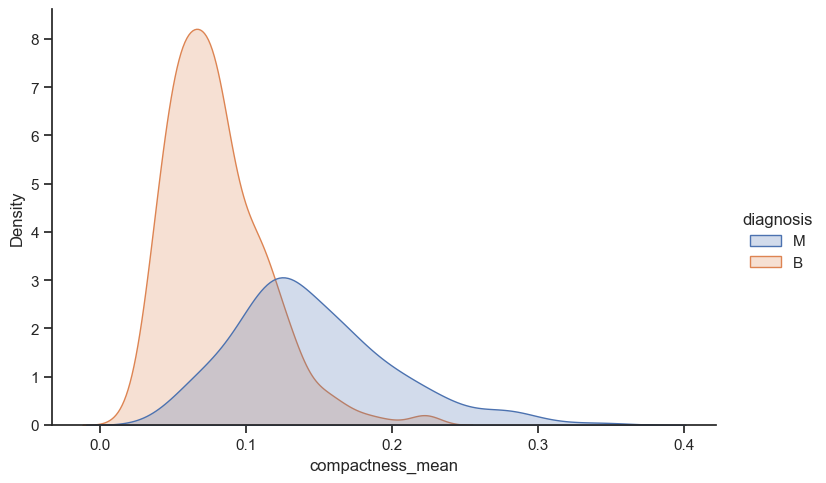

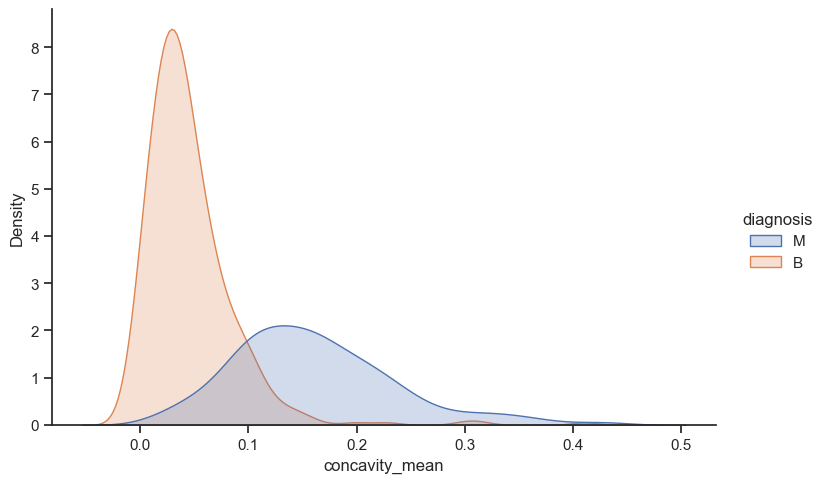

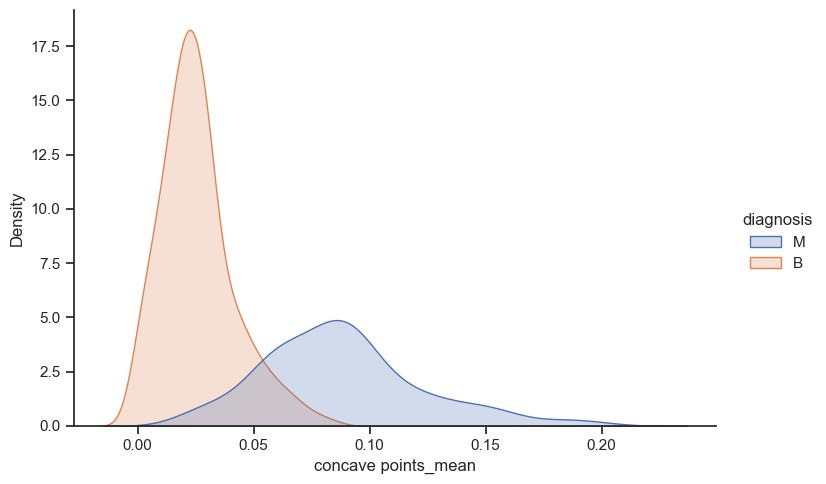

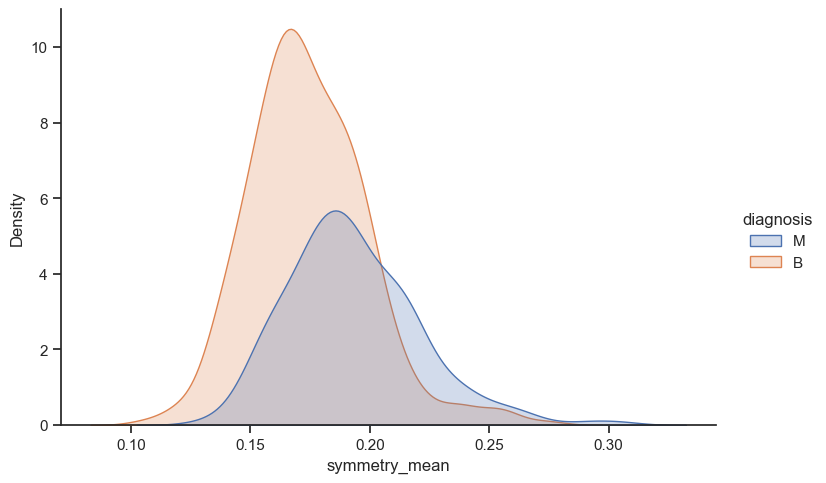

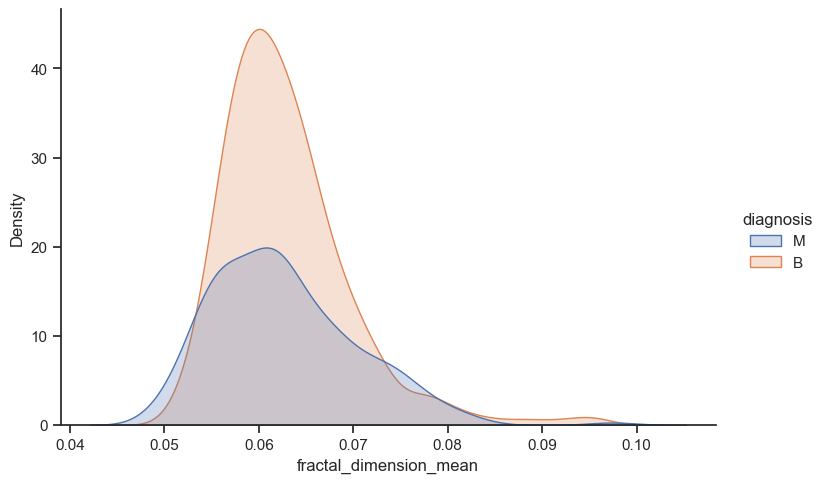

In [103]:
columns=['texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
# create kernel density estimation plots for the selected columns with seaborn
for col in columns:
    sns.displot(data=df, x=col, kind='kde',hue='diagnosis', fill=True, height=5,aspect=1.5)
    plt.show()

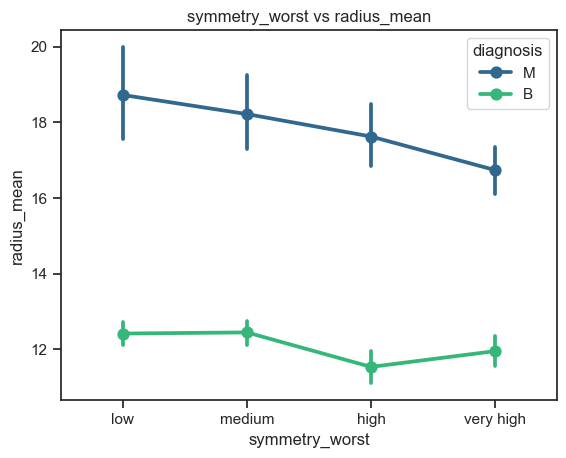

In [104]:
df['symmetry_worst']=pd.qcut(df['symmetry_worst'],q=4,labels=['low','medium','high','very high'])
sns.pointplot(data=df, x="symmetry_worst", y="radius_mean", hue="diagnosis",palette='viridis')
plt.title("symmetry_worst vs radius_mean")
plt.show()

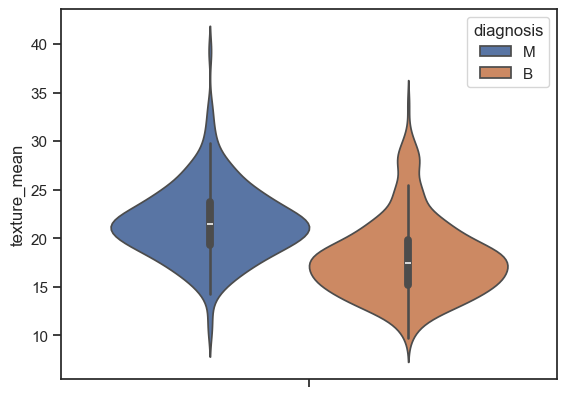

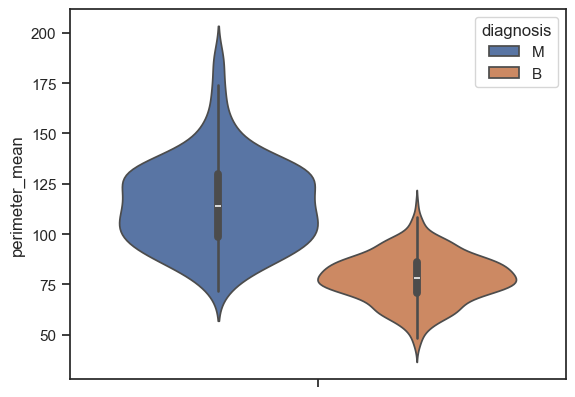

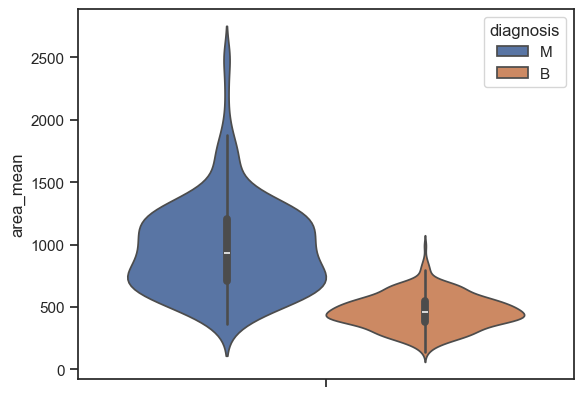

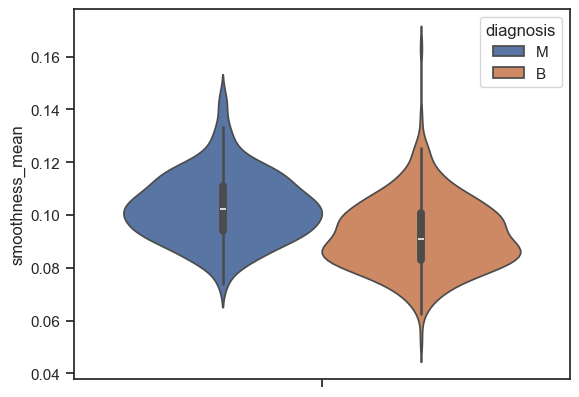

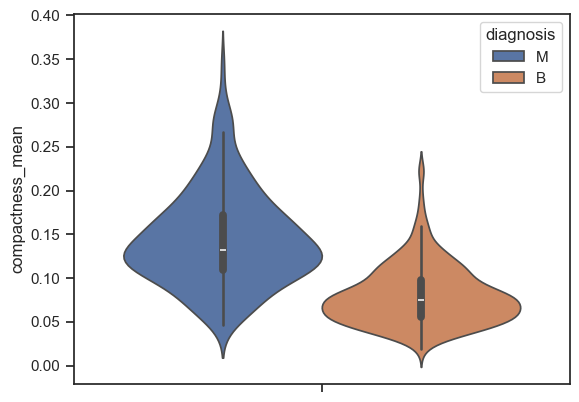

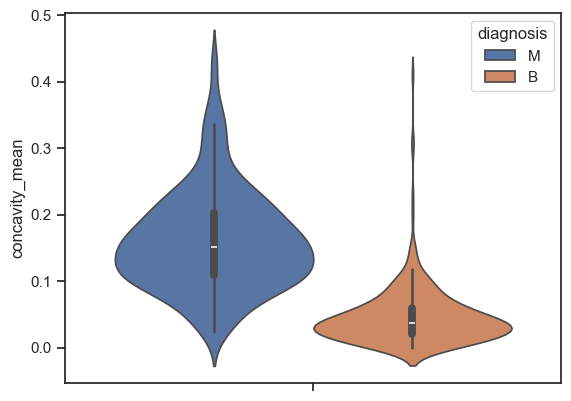

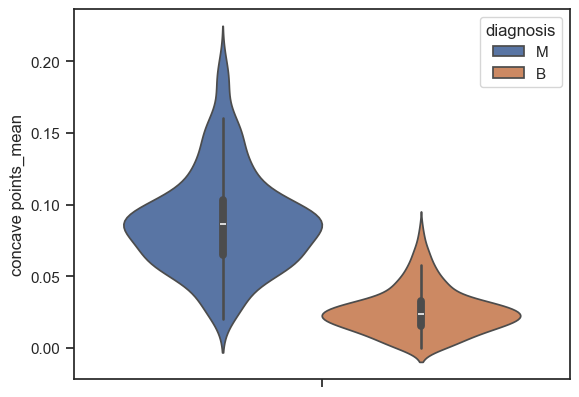

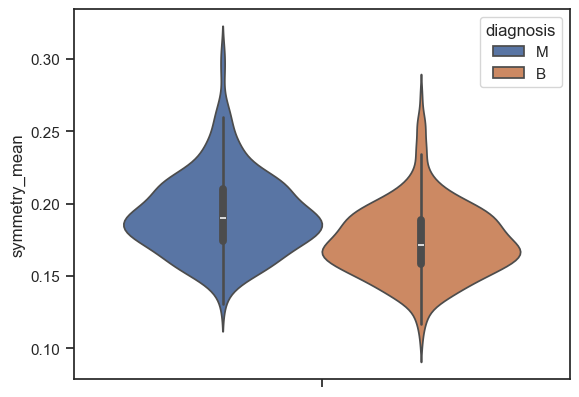

In [105]:
columns=['texture_mean' , 'perimeter_mean' , 'area_mean' , 'smoothness_mean' ,'compactness_mean' ,'concavity_mean' ,'concave points_mean' ,'symmetry_mean'] 
# 🎻 Violin Plot
for col in columns:
  sns.violinplot(data=df,y=col,hue='diagnosis')
  plt.show()

In [116]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_14468\2761687793.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


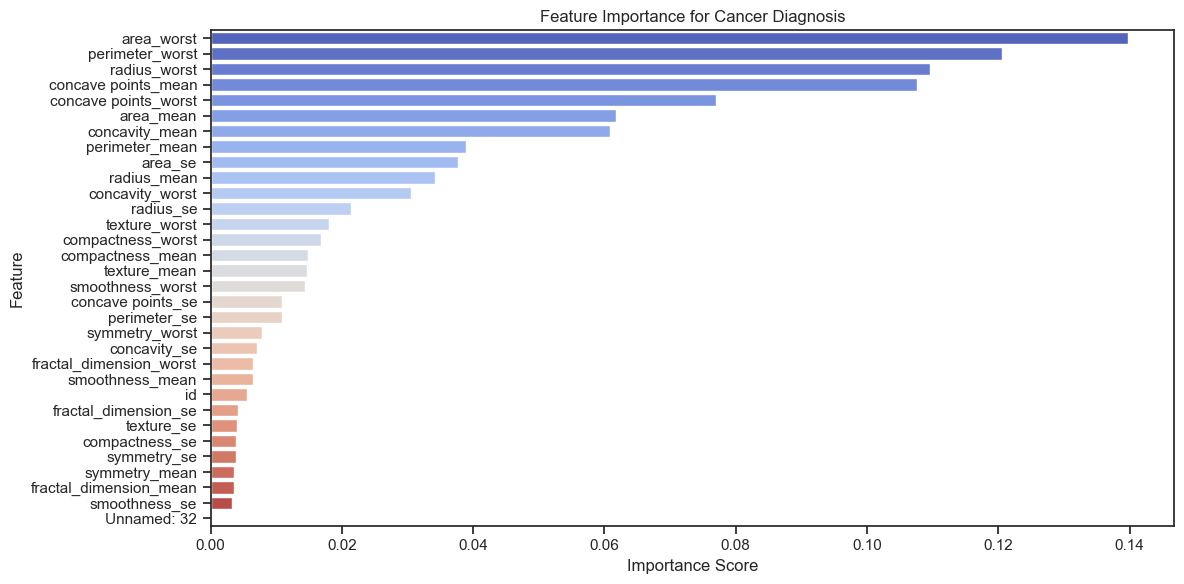

In [117]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Assume df is your full dataset and it includes 'diagnosis' as the target
X = df.drop(columns=['diagnosis']) # drop non-feature columns
y = df['diagnosis']

# Train a basic model
model = RandomForestClassifier(random_state=0)
model.fit(X, Y)
#Train a basic model
model = RandomForestClassifier()
model.fit(X, y)

#Get feature importances
importances = model.feature_importances_  #feature_importances

#Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

#Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance for Cancer Diagnosis')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [130]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

df.head()

In [134]:
# create bubble chart using plotly
import plotly.express as px

fig = px.scatter(df, x="area_mean", y="smoothness_mean", size="compactness_mean", color="diagnosis")
fig.show()

In [136]:
import plotly.graph_objects as go  
import pandas as pd  

df = pd.read_csv("data.csv")

fig = go.Figure()

fig.add_trace(go.Violin(
    x=df['diagnosis'],            # categorical
    y=df['radius_mean'],          # numeric
    name='radius_mean',
    box_visible=True,
    points='all',     # optional
    meanline_visible=True
))

fig.update_layout(violinmode='overlay')
fig.show()

In [137]:
fig = go.Figure()

fig.add_trace(go.Violin(
    x=['M']*len(df[df['diagnosis']=='M']),
    y=df['radius_mean'][df['diagnosis']=='M'],
    name='Malignant',
    side='negative',
    box_visible=True,
    points='all'
))

fig.add_trace(go.Violin(
    x=['B']*len(df[df['diagnosis']=='B']),
    y=df['radius_mean'][df['diagnosis']=='B'],
    name='Benign',
    side='positive',
    box_visible=True,
    points='all'
))

fig.update_layout(violinmode='overlay')
fig.show()

In [138]:
# Variation of the perimeter worst for "both" tumor id:

import plotly.express as px

fig = px.bar(df, x="diagnosis", y="perimeter_worst", color="diagnosis", animation_frame="id", range_y=[0,300])
fig.show()